In [7]:
from google.cloud import vision
import io
import glob
import os
import os.path
import cv2
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import clear_output, Image, display
from io import BytesIO
import PIL.Image
###### before running, please run export GOOGLE_APPLICATION_CREDENTIALS='/path/to/your/client_secret.json'
#export GOOGLE_APPLICATION_CREDENTIALS='/c/Users/poorv/Downloads/ocr_scripts/keys/direct-outlook-270501-c05c2d97d1c6.json'
#echo $GOOGLE_APPLICATION_CREDENTIALS 
#os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = 
#"C:/Users/poorv/Downloads/ocr_scripts/keys/direct-outlook-270501-c05c2d97d1c6.json"

In [14]:
def sa(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

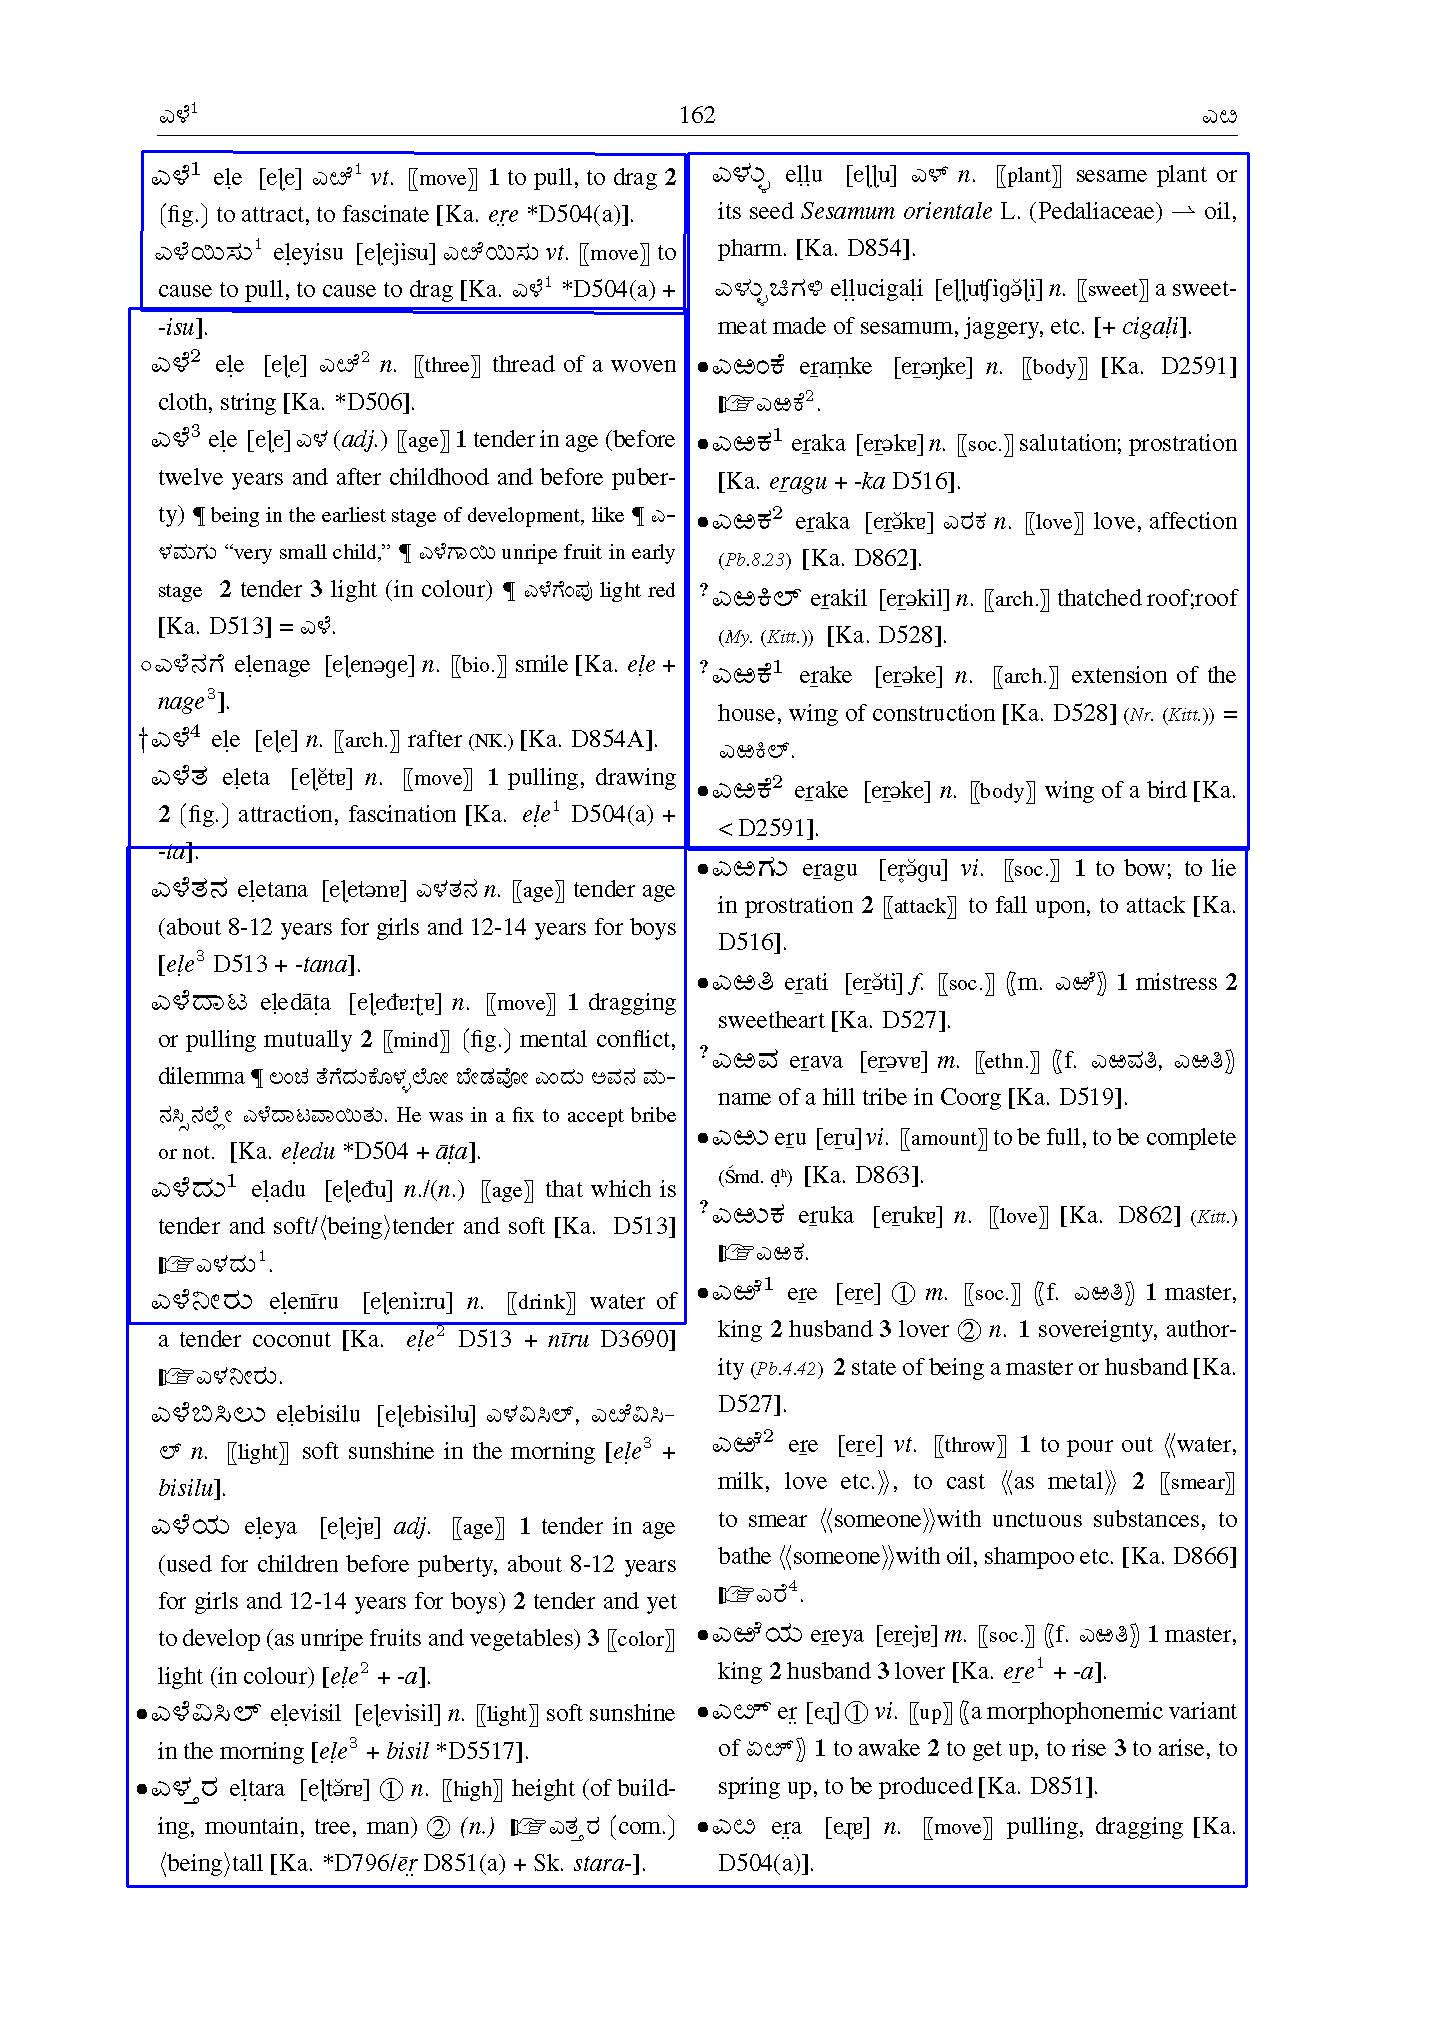

In [40]:
pg188 = "jpgs/output-190-to-190.jpg"
os.path.isfile(pg188)
tc = cv2.imread(pg188) 
sa(tc)

im = tc.copy()
im_gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(im_gray,127,255,cv2.THRESH_BINARY_INV)
sa(thresh)

edges = cv2.Canny(im_gray,50,150,apertureSize = 3)
minLineLength = 500
maxLineGap = 500
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(thresh,(x1,y1),(x2,y2),(0),5)
# sa(thresh)

kernel = np.ones((3,3),np.uint8)

thresh = cv2.dilate(thresh,kernel,iterations = 10)
# struct = cv2.getStructuringElement(cv2.MORPH_RECT, (100,100))
# thresh = cv2.dilate(thresh, struct, anchor=(-1, -1), iterations=20)

contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
minArea=5000 #nothing 
for cnt in contours:
    area=cv2.contourArea(cnt)
    if(area>minArea):
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        cv2.drawContours(im,[box],0,(0,0,255),2)

# cv2.imshow("thresh", im)
# cv2.imwrite('so_result.jpg',im)
# cv2.waitKey(0)
sa(im)

In [10]:
height, width, channels = image.shape
print(width)
#int(width/2)
right = image[0:height, int(width/2):width] #this line crops
left = image[0:height, 0:680]

1434


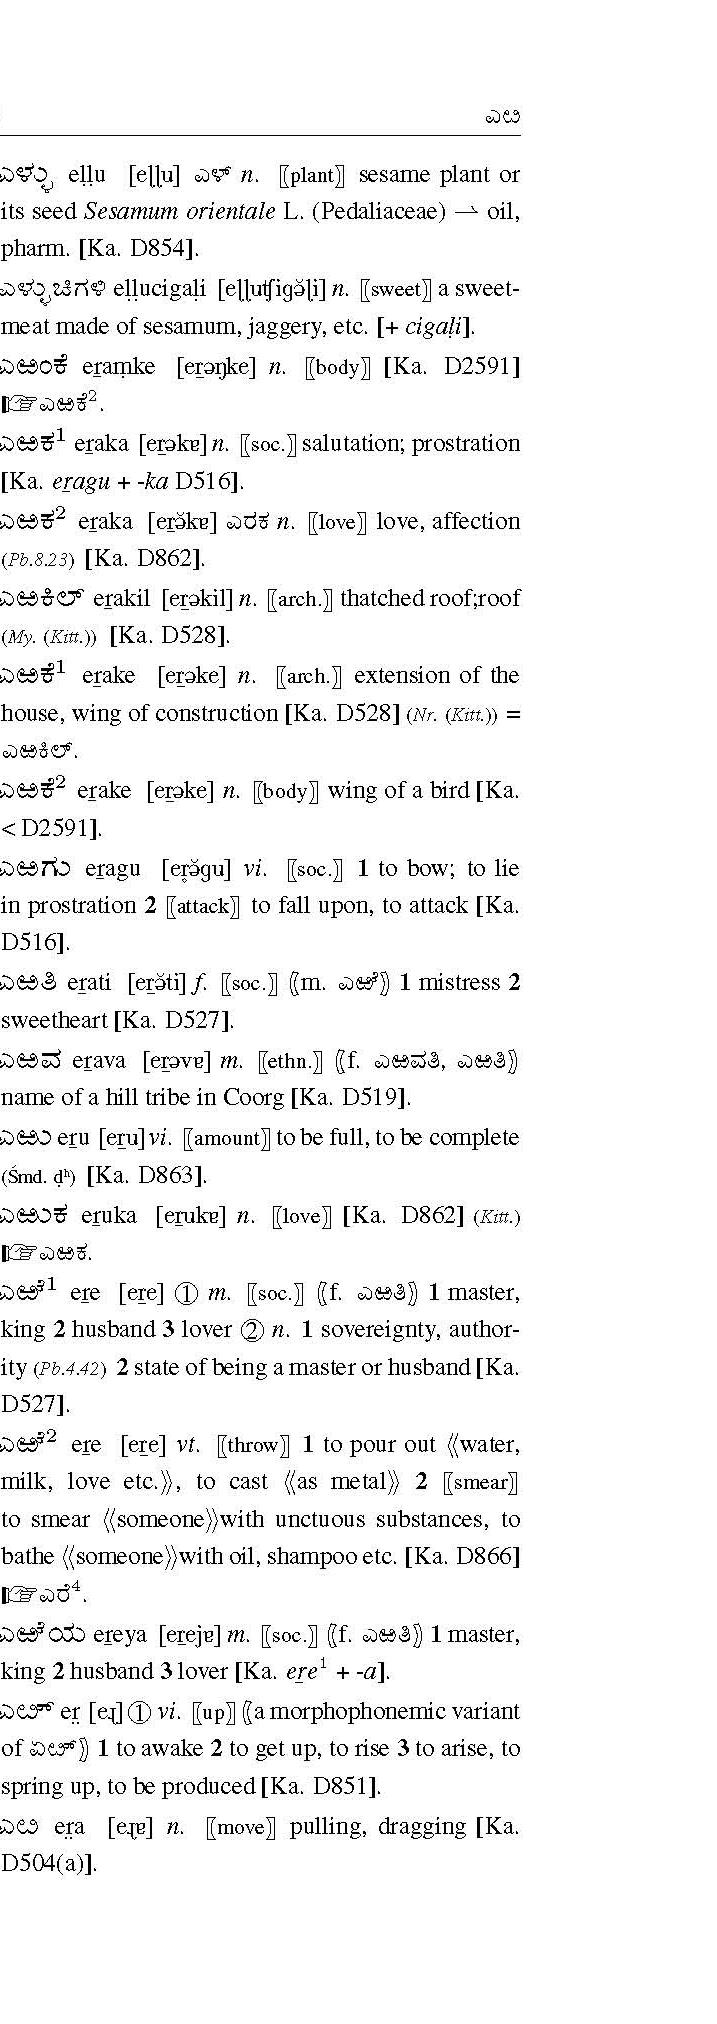

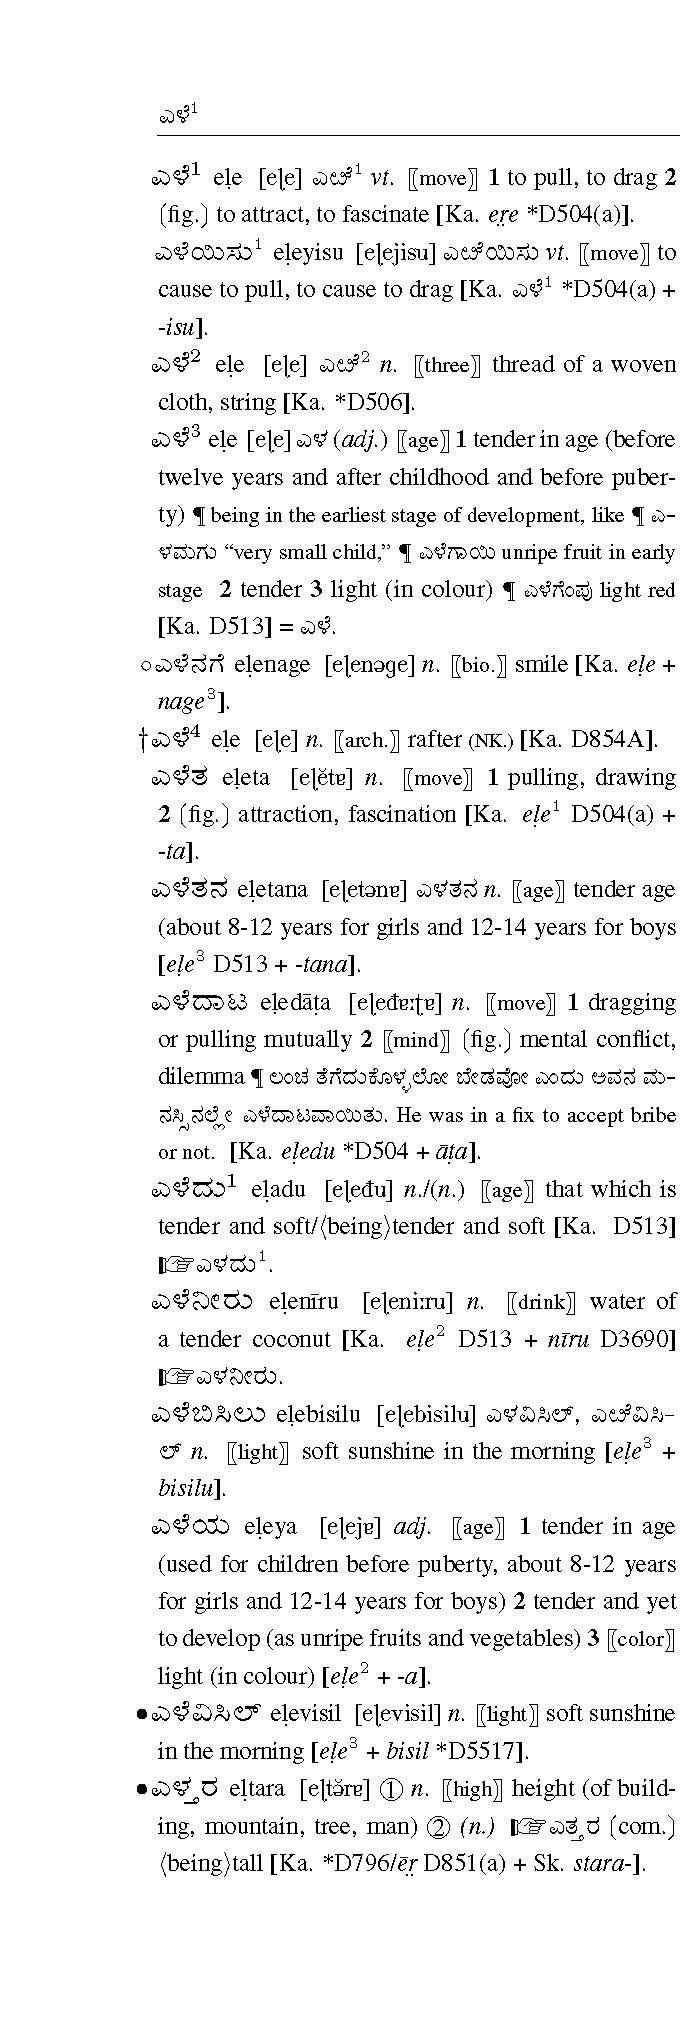

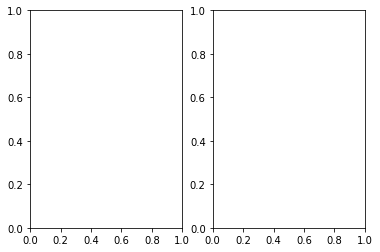

In [11]:
plt.subplot(121)
showarray(right)
plt.subplot(122)
showarray(left)
plt.show()

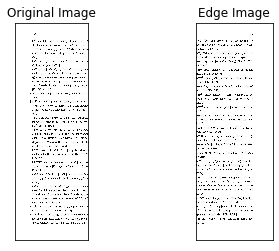

In [12]:
plt.subplot(121),plt.imshow(left,cmap = 'gray')
plt.subplot(122),plt.imshow(right,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()


# OCR

In [ ]:
def dtlh(path, lh):
    """Detects text in the file."""
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()

    image = vision.types.Image(content=content)

    response = client.text_detection(
    image=image,
    image_context={"language_hints": lh},  # Bengali
    )
    texts = response.text_annotations
    print(texts[0].description)
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [ ]:
dtlh(pg188, ["kn"])